<a href="https://colab.research.google.com/github/alfandoo/Loan-Approval/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
# -----------------------------
# 1) Import Library
# -----------------------------
import os
import warnings
warnings.filterwarnings('ignore')

# Data & Utils
import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Colab Drive
from google.colab import drive
drive.mount('/content/drive')

# Preprocessing
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

Mounted at /content/drive


# Data Understanding

In [3]:
# -----------------------------
# 2) Data Understanding
# -----------------------------
DATA_PATH = '/content/drive/MyDrive/portfolio/loan_data.csv'
df = pd.read_csv(DATA_PATH)

In [4]:
print('Shape:', df.shape)
display(df.head(10))

Shape: (45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [7]:
print(df.info())
print("---")
display(df.describe().T)
print("---")
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


---


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000,45000,4.500000e+04,45000.000000,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000,45000.000000
unique,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,27.764178,NaN,NaN,8.031905e+04,5.410333,NaN,9583.157556,NaN,11.006606,0.139725,5.867489,632.608756,NaN,0.222222
std,6.045108,NaN,NaN,8.042250e+04,6.063532,NaN,6314.886691,NaN,2.978808,0.087212,3.879702,50.435865,NaN,0.415744
min,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,24.000000,NaN,NaN,4.720400e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,26.000000,NaN,NaN,6.704800e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,30.000000,NaN,NaN,9.578925e+04,8.000000,NaN,12237.250000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


In [8]:
# Missing & Duplicates
print('\nMissing values per column:\n', df.isnull().sum())
print('\nDuplicated rows:', df.duplicated().sum())


Missing values per column:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Duplicated rows: 0


# Data Preparation

In [9]:
# -----------------------------
# 3) Data Preparation
# -----------------------------
numeric_col = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'credit_score'
]
print('\nNumeric columns:', numeric_col)


Numeric columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score']


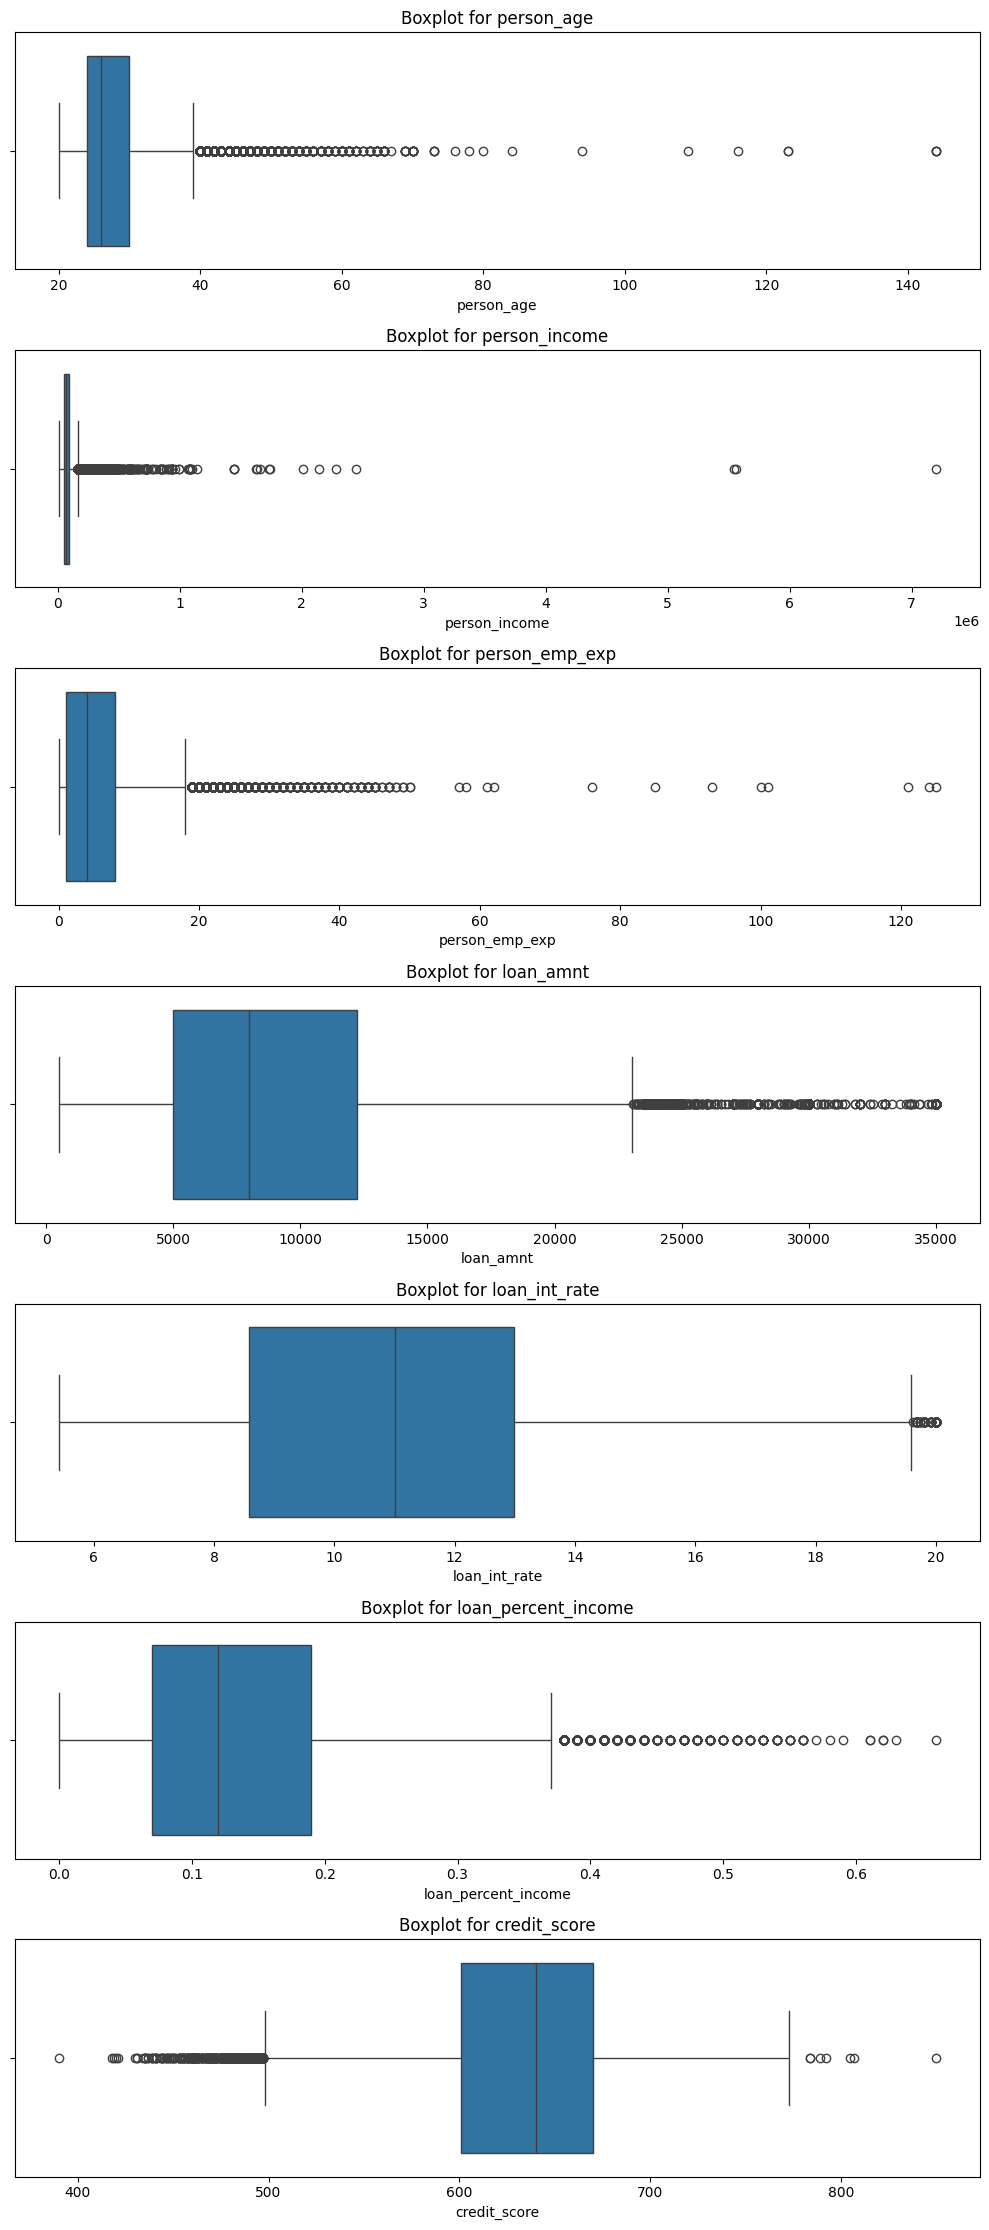

In [10]:
# 3.1 Outlier Check (Boxplot)
plt.figure(figsize=(10, len(numeric_col) * 3.2))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(len(numeric_col), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [11]:
# 3.2 Outlier Trimming (IQR)
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print('Shape after IQR trimming:', df.shape)
display(df.describe().T)

Shape after IQR trimming: (36813, 14)


,count,mean,std,min,25%,50%,75%,max
person_age,36813.0,26.623503,4.115501,20.00,23.00,26.00,29.00,39.00
person_income,36813.0,70098.034390,31573.002271,8000.00,46480.00,64831.00,88642.00,166754.00
person_emp_exp,36813.0,4.270801,4.084372,0.00,1.00,3.00,7.00,16.00
loan_amnt,36813.0,8280.069867,4781.682596,500.00,4800.00,7400.00,11050.00,22500.00
loan_int_rate,36813.0,10.883534,2.927000,5.42,8.49,11.01,12.92,19.69
loan_percent_income,36813.0,0.129748,0.071590,0.01,0.07,0.12,0.18,0.32
cb_person_cred_hist_length,36813.0,5.209654,3.003809,2.00,3.00,4.00,7.00,17.00
credit_score,36813.0,632.369462,47.680705,498.00,601.00,639.00,668.00,762.00
loan_status,36813.0,0.202021,0.401513,0.00,0.00,0.00,0.00,1.00


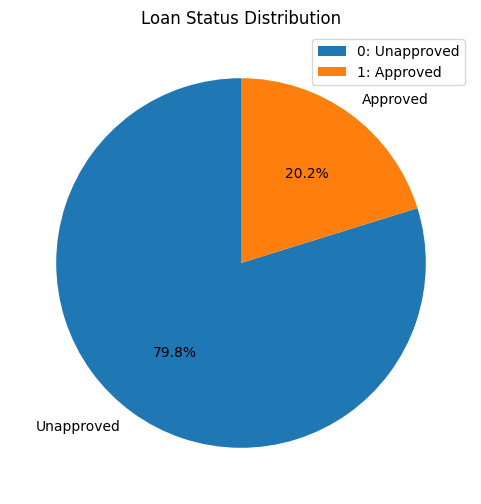

In [12]:
# 3.3 Target Balance Check
counts = df['loan_status'].value_counts()
plt.figure(figsize=(6, 6))
labels = counts.index.map({0:'Unapproved', 1:'Approved'})
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.legend(['0: Unapproved', '1: Approved'], loc='upper right')
plt.show()

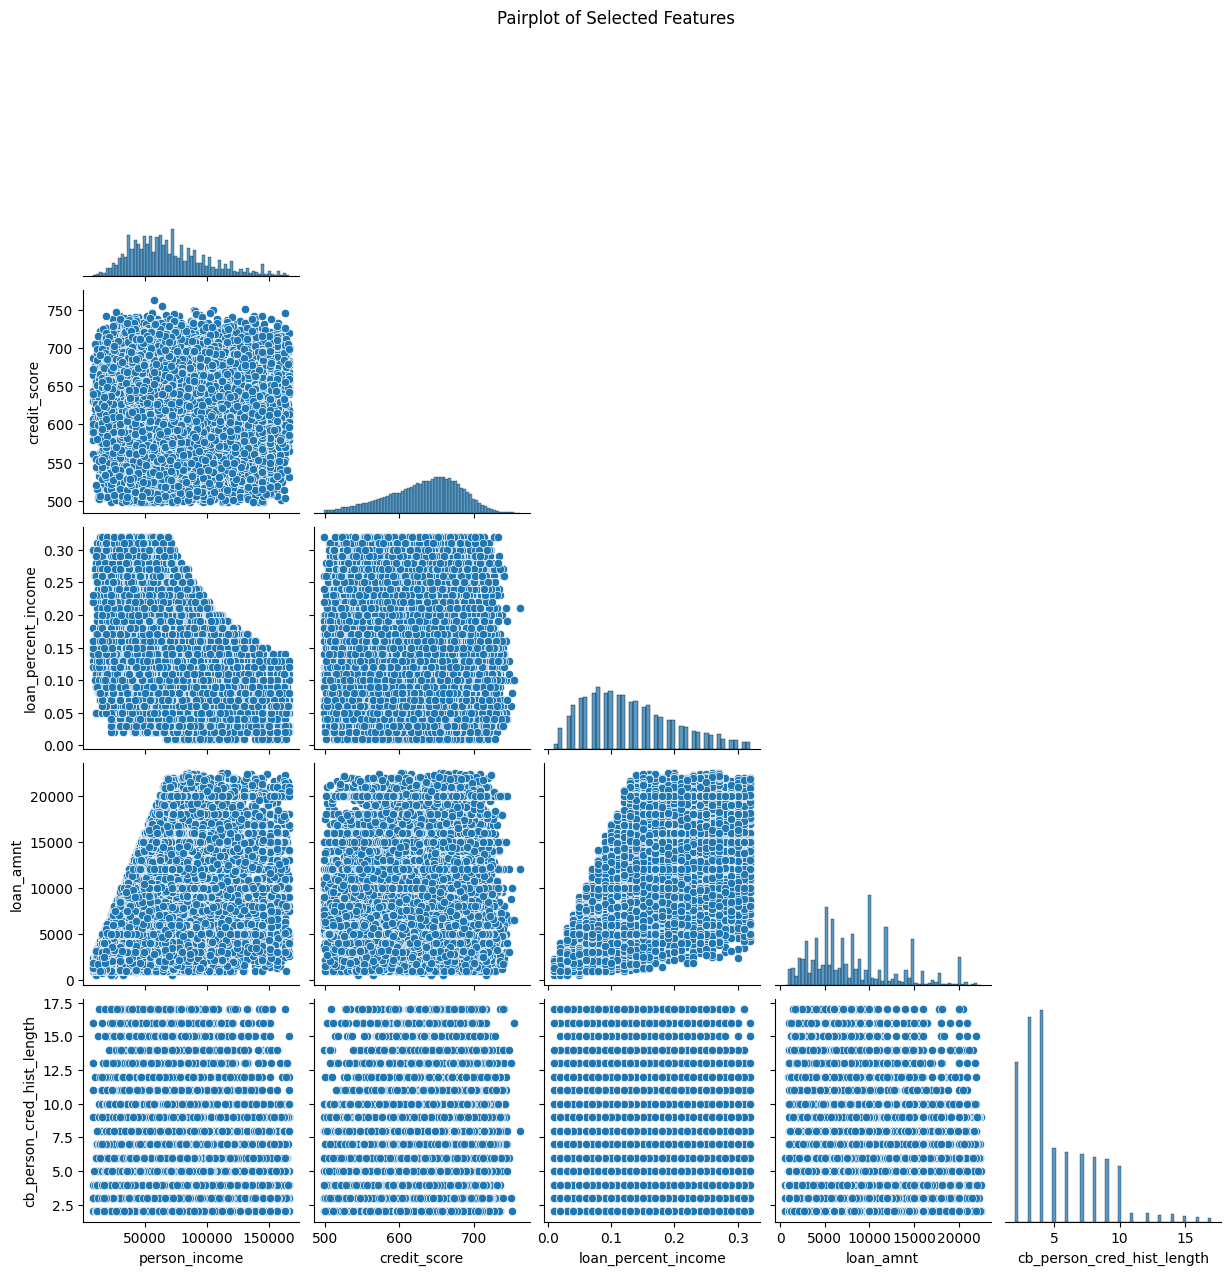

In [13]:
# -----------------------------
# 3.4 Exploratory Data Analysis (EDA)
# -----------------------------
# Pairplot fitur inti
features = ['person_income', 'credit_score', 'loan_percent_income', 'loan_amnt', 'cb_person_cred_hist_length']
sns.pairplot(df[features], corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

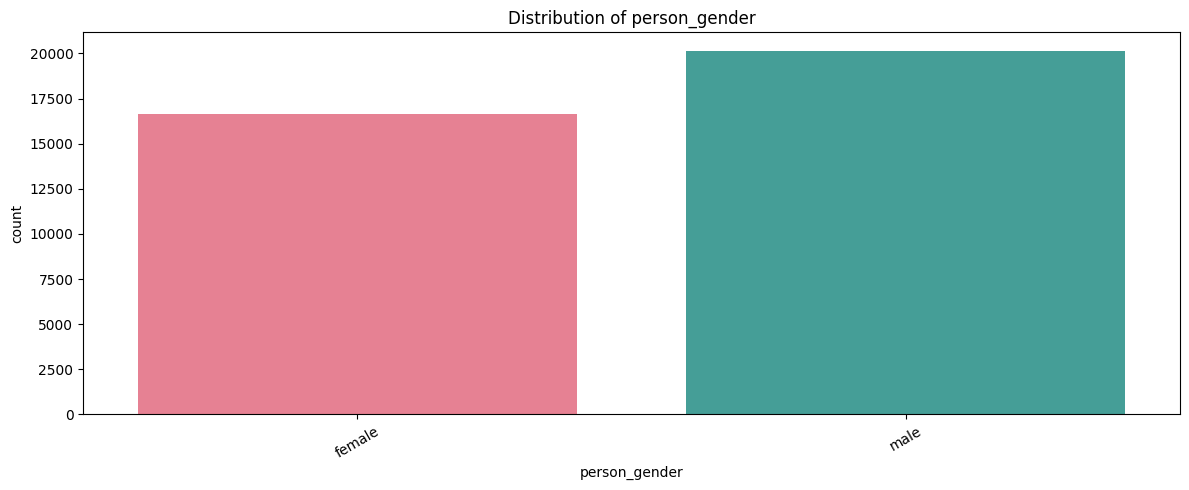

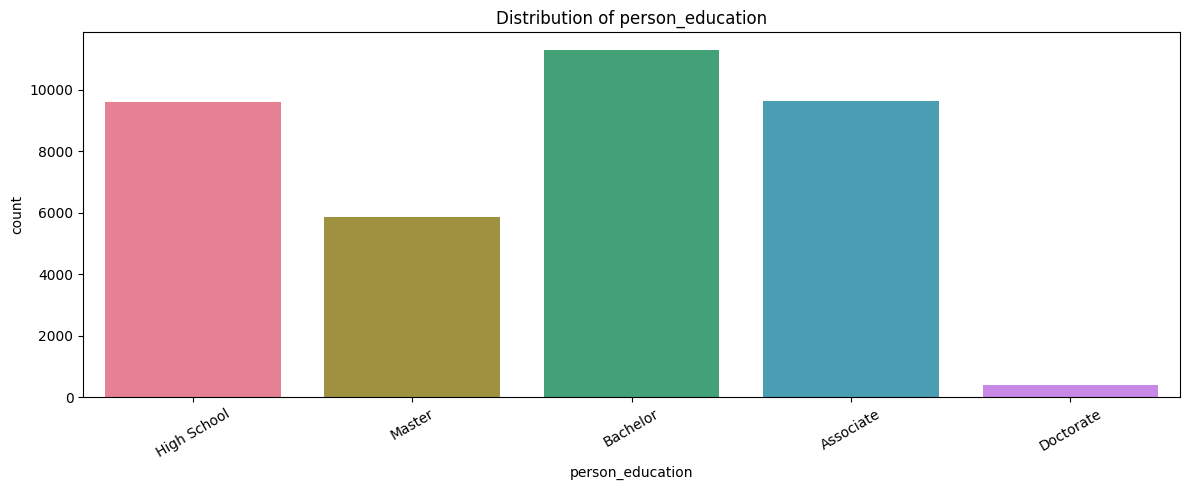

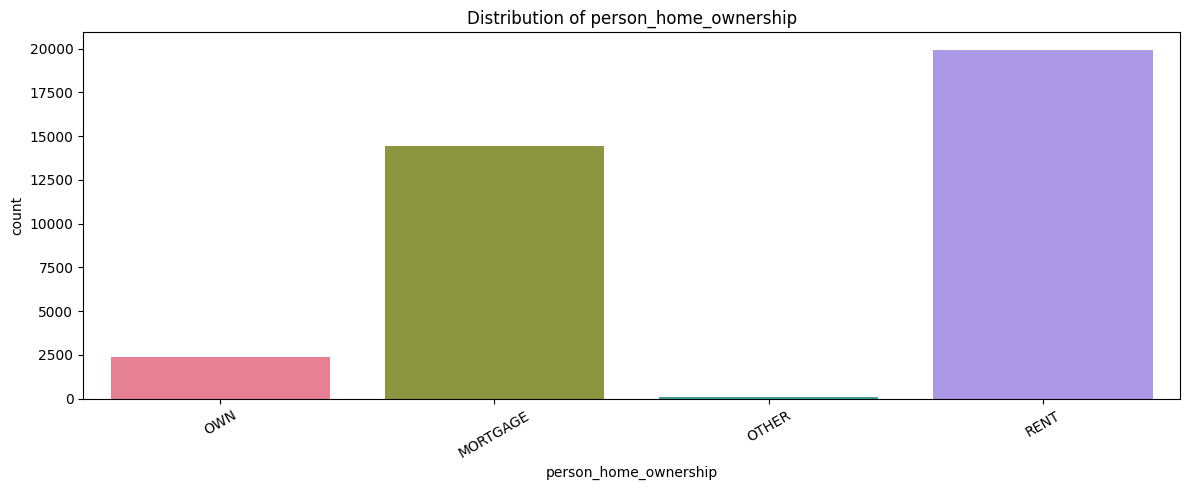

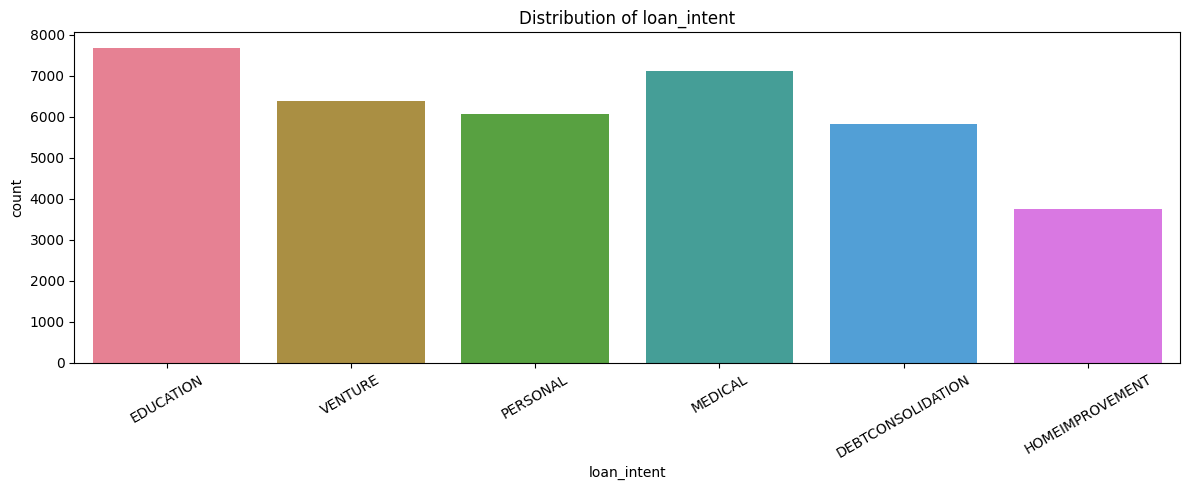

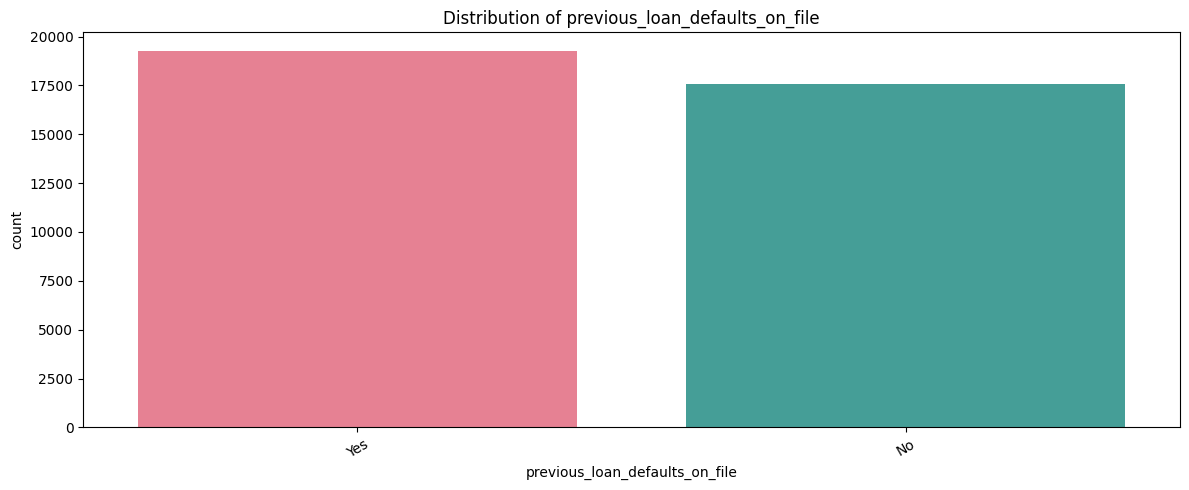

In [15]:
# Distribusi kategori
cat_col = [
    'person_gender', 'person_education', 'person_home_ownership',
    'loan_intent', 'previous_loan_defaults_on_file'
]
for x in cat_col:
    plt.figure(figsize=(12,5))
    sns.countplot(x=df[x], palette='husl')
    plt.title(f'Distribution of {x}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

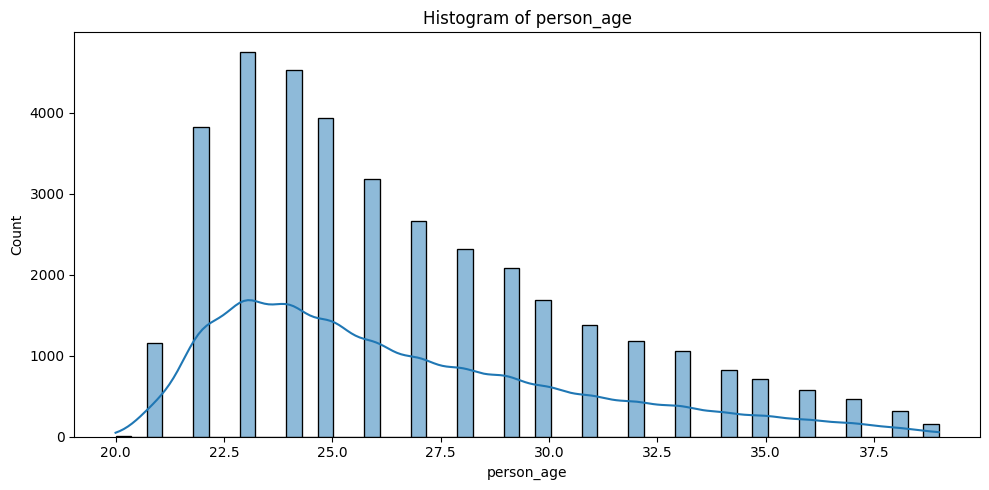

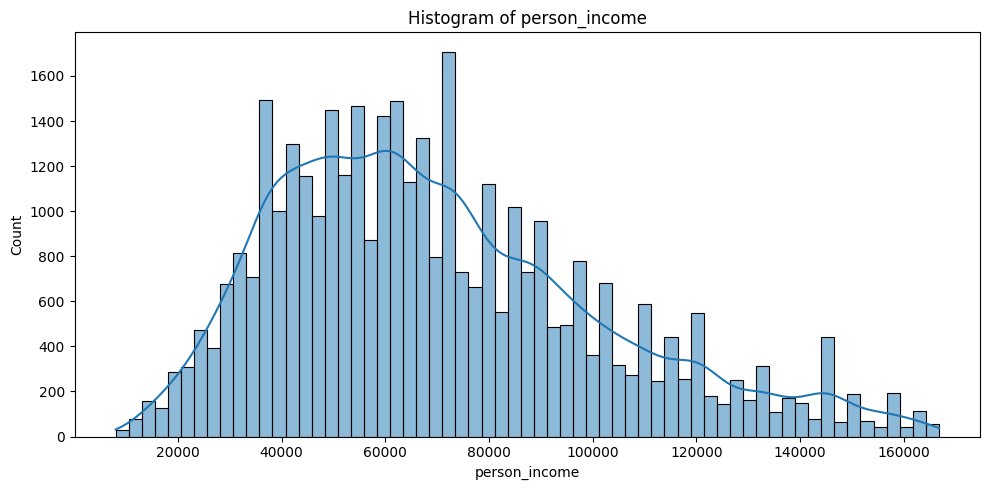

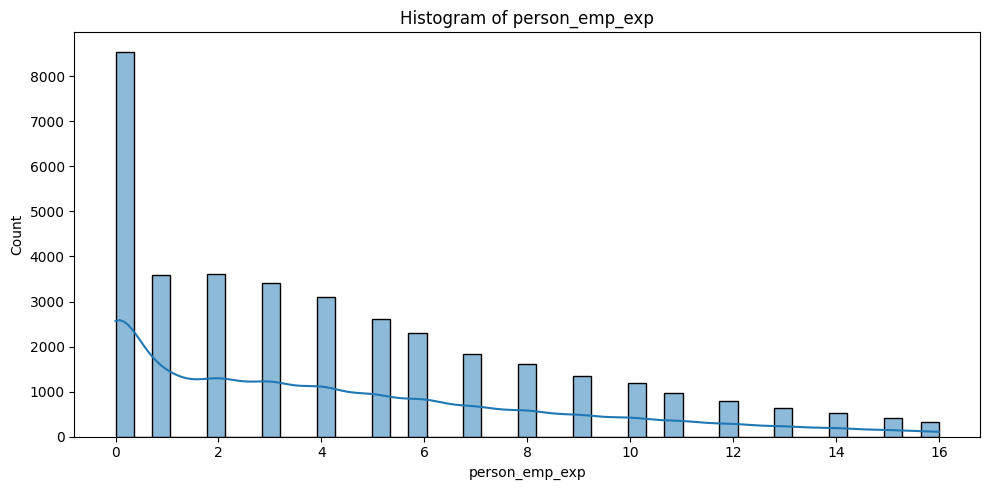

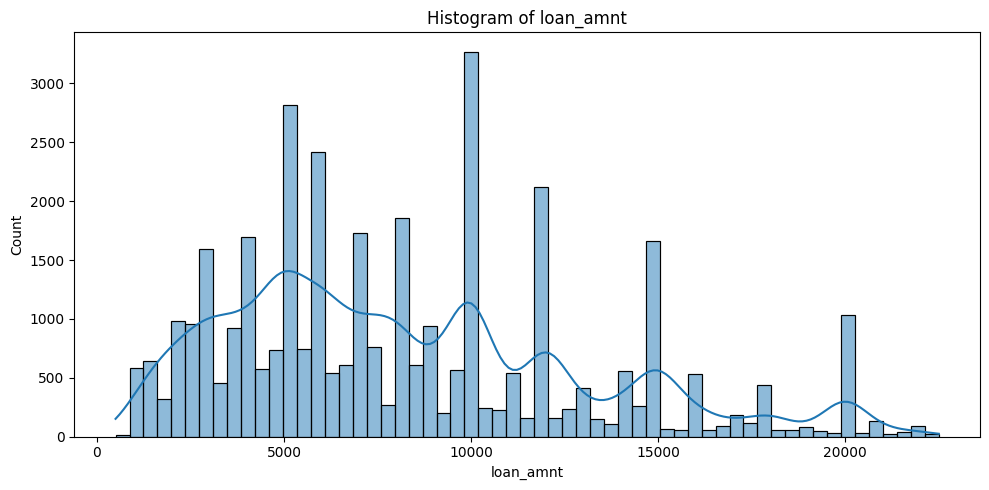

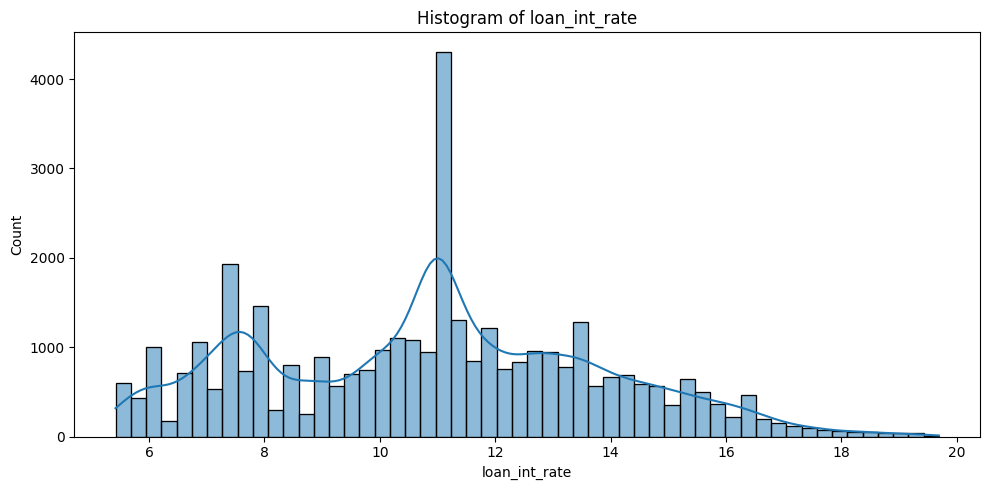

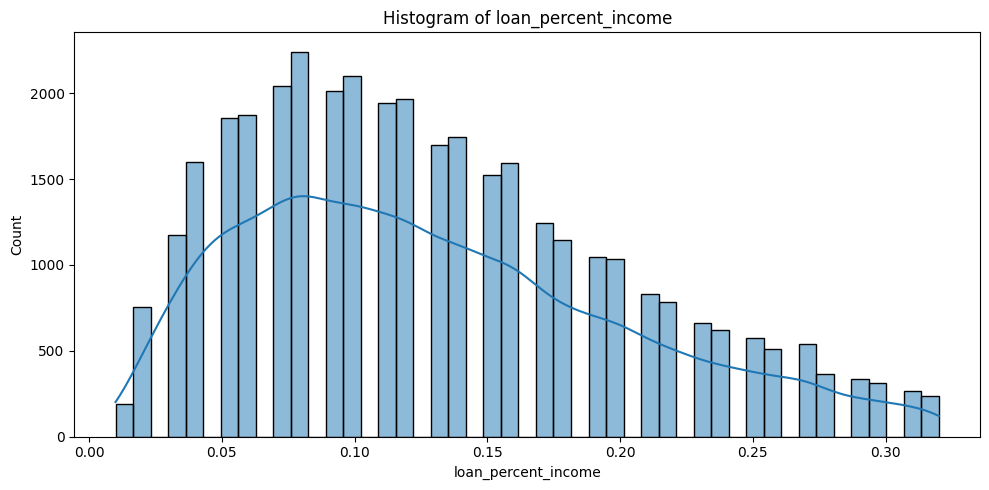

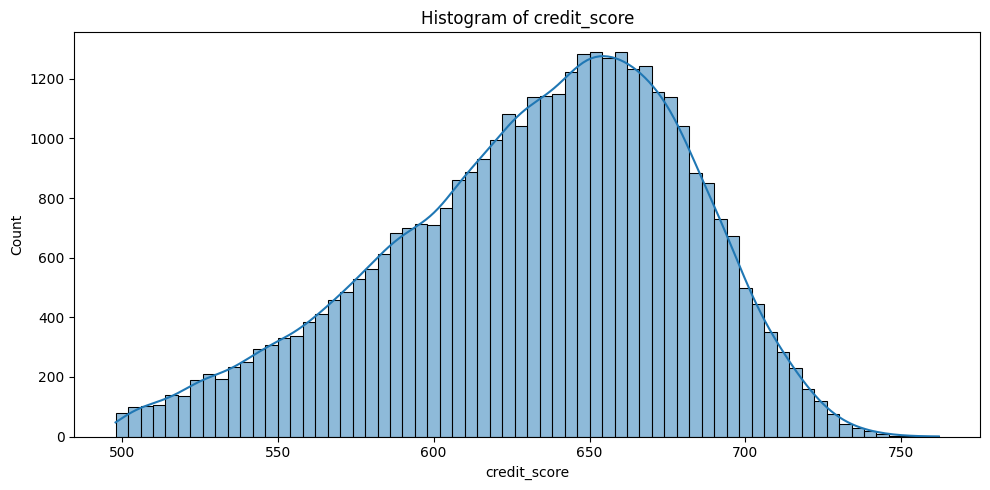

In [16]:
# Univariate numerik
for col in numeric_col:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

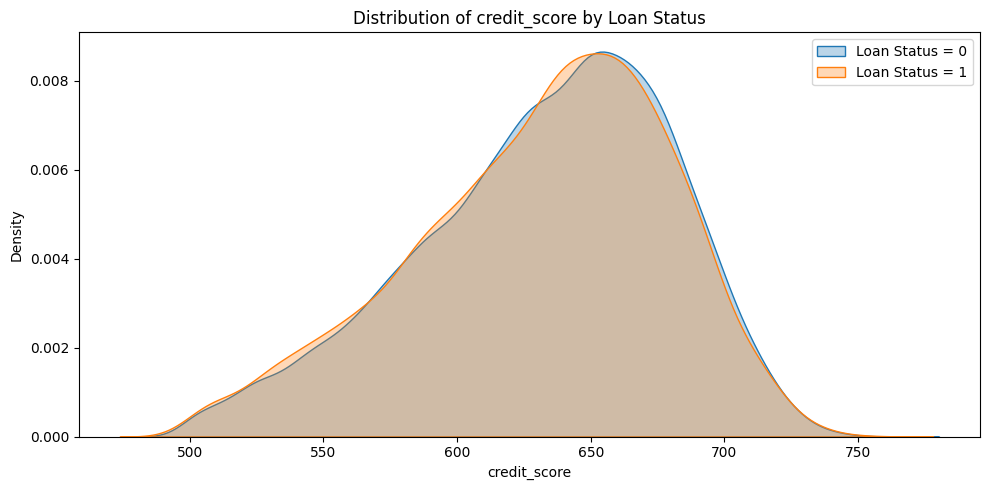

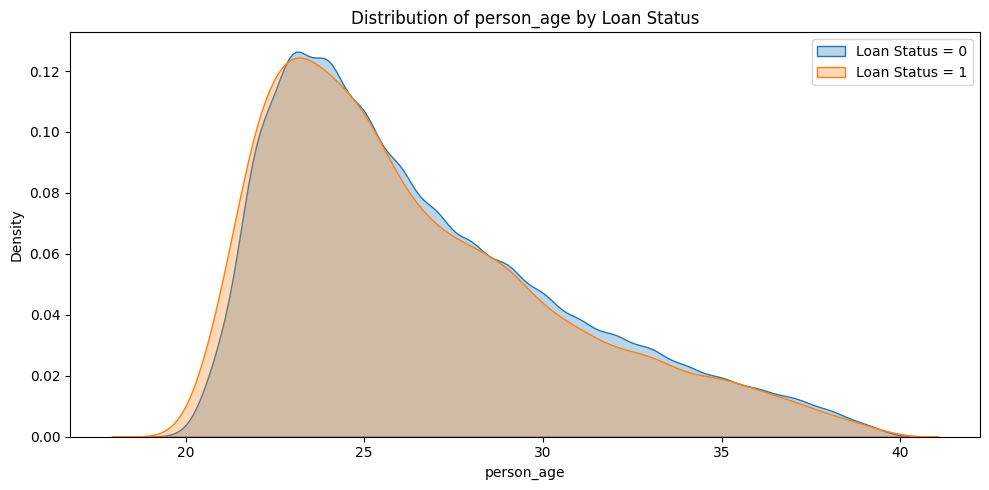

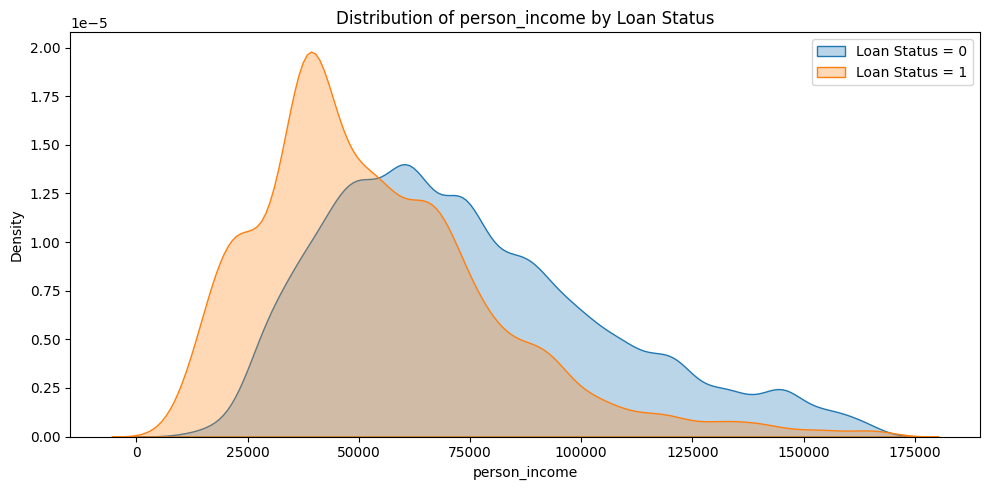

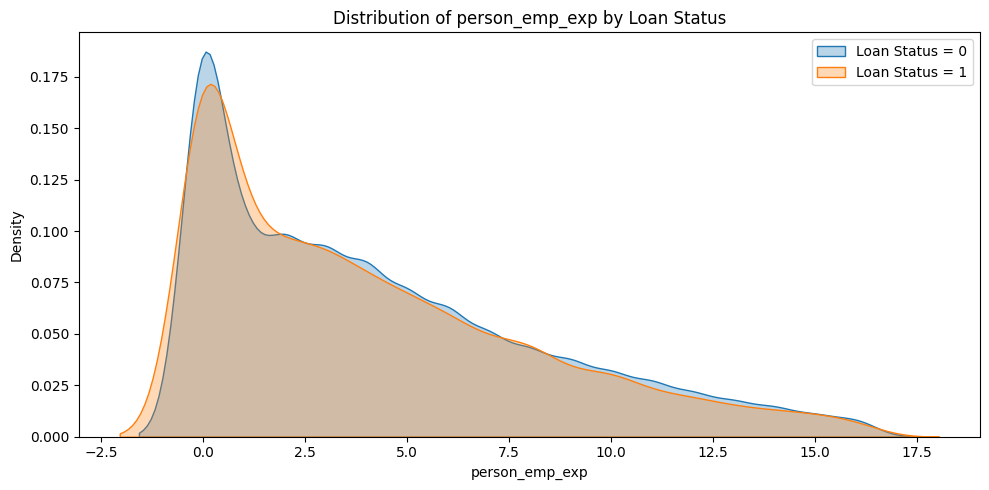

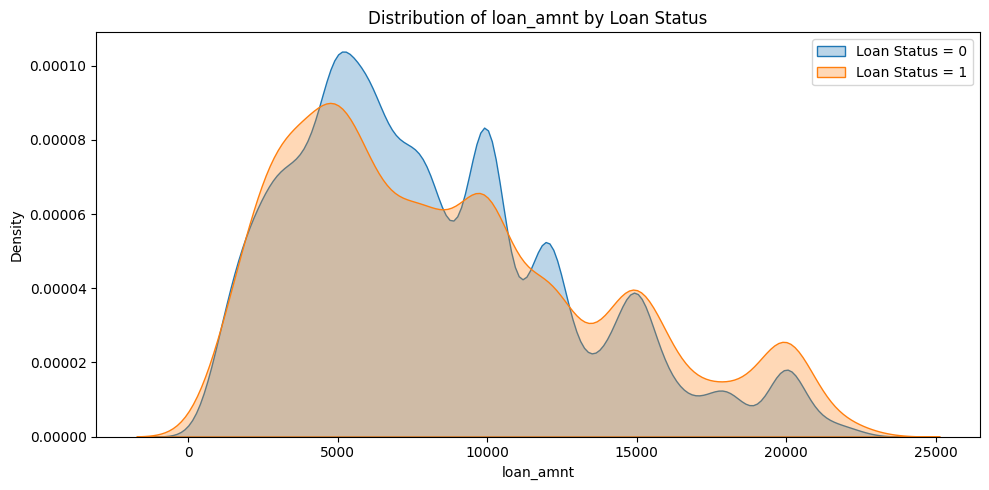

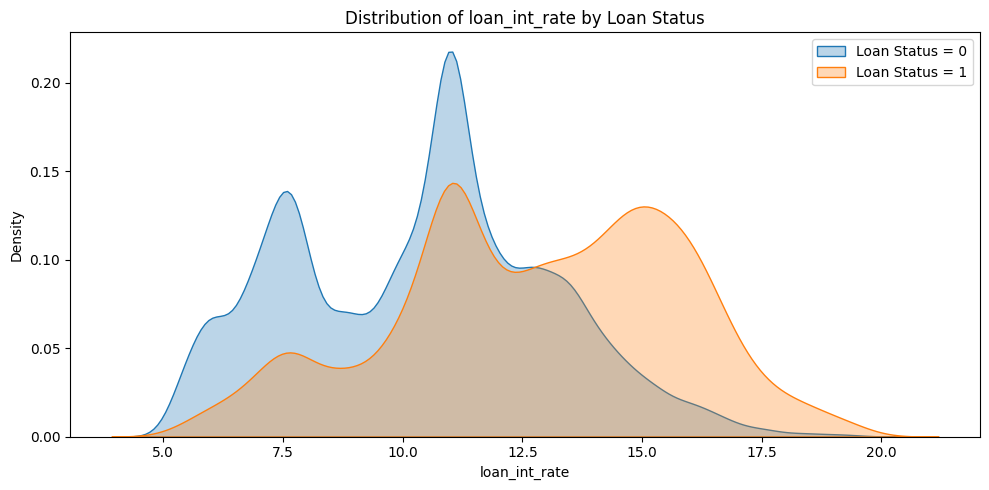

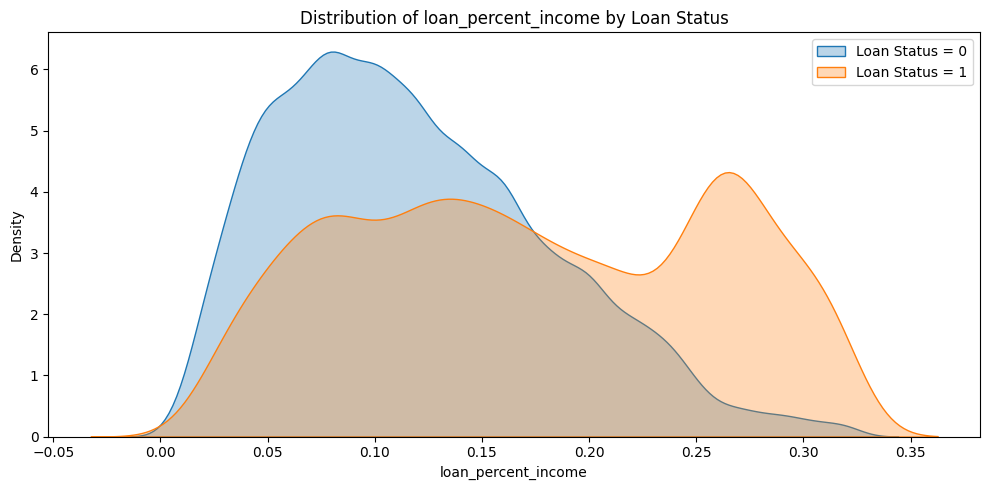

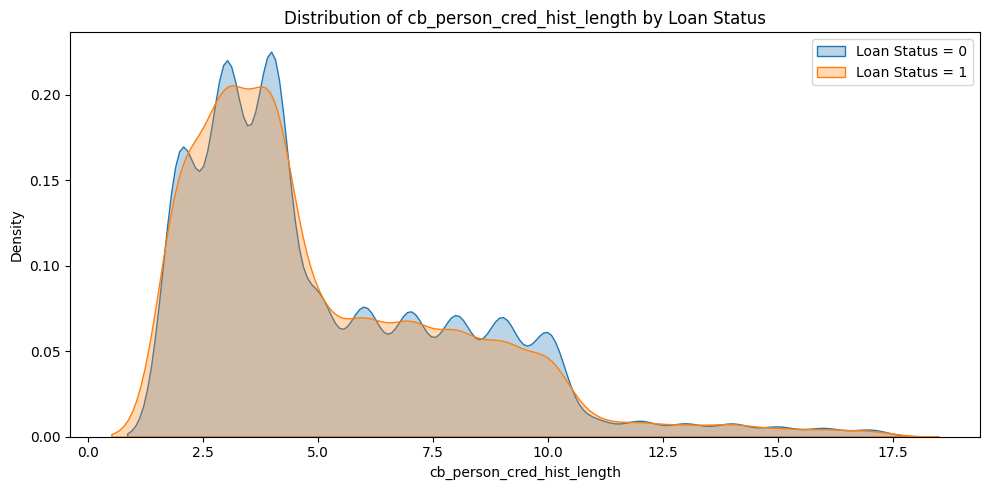

In [17]:
# Bivariate (target vs numerik)
pairs = [
    'credit_score','person_age','person_income','person_emp_exp',
    'loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length'
]
for p in pairs:
    if p in df.columns:
        plt.figure(figsize=(10,5))
        sns.kdeplot(df.loc[df['loan_status']==0, p], fill=True, alpha=0.3, label='Loan Status = 0')
        sns.kdeplot(df.loc[df['loan_status']==1, p], fill=True, alpha=0.3, label='Loan Status = 1')
        plt.title(f'Distribution of {p} by Loan Status')
        plt.legend()
        plt.tight_layout()
        plt.show()

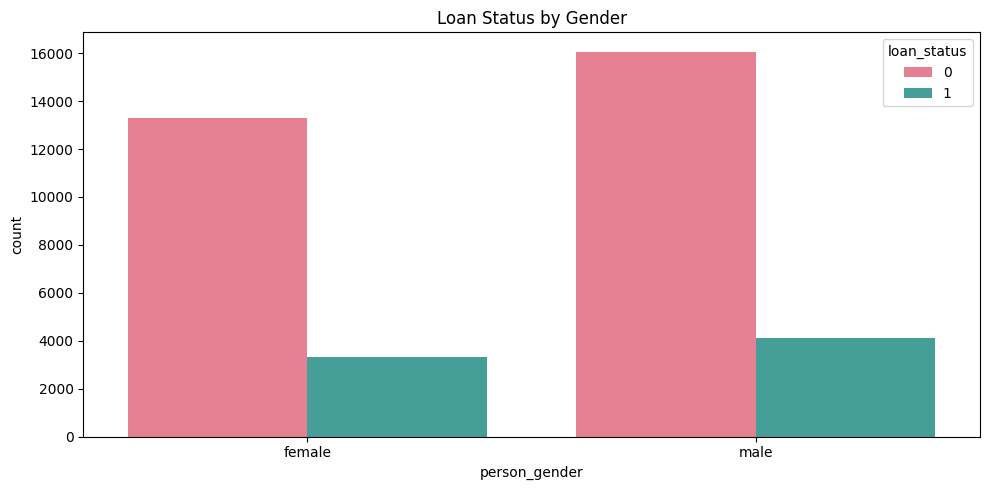

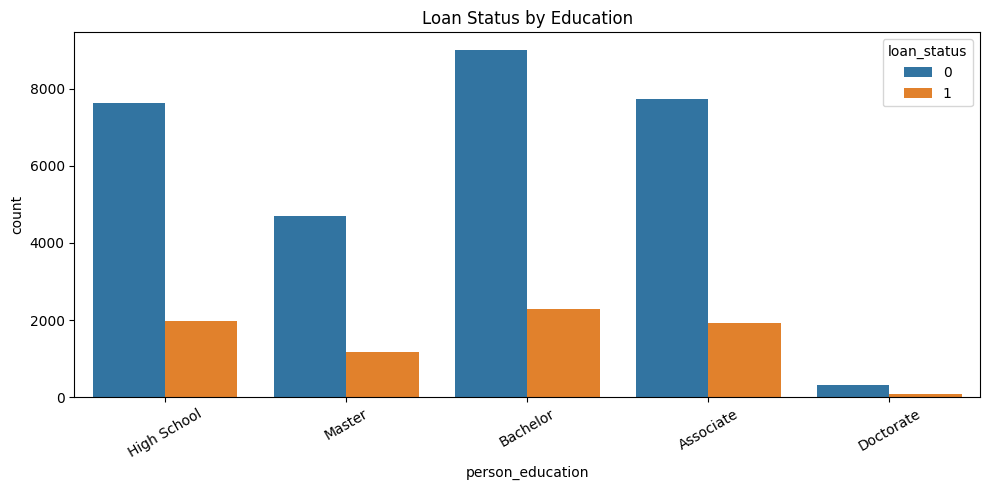

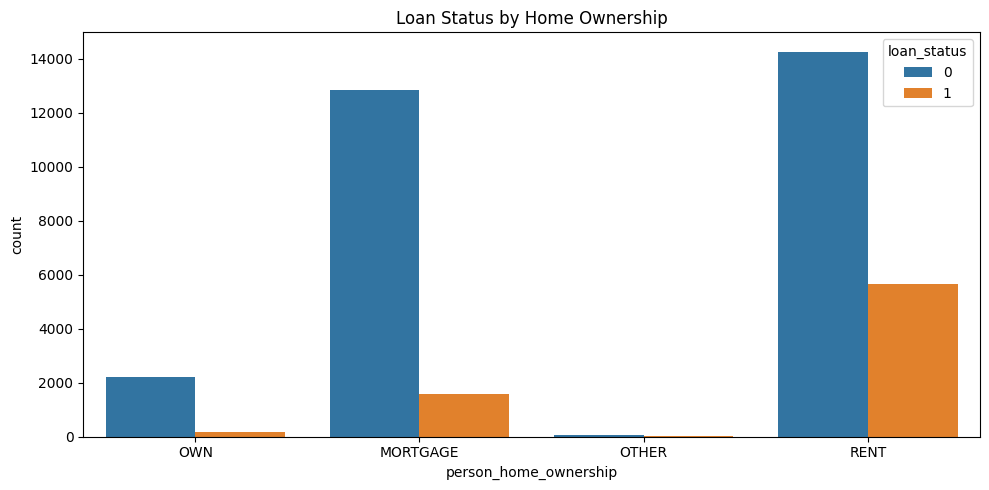

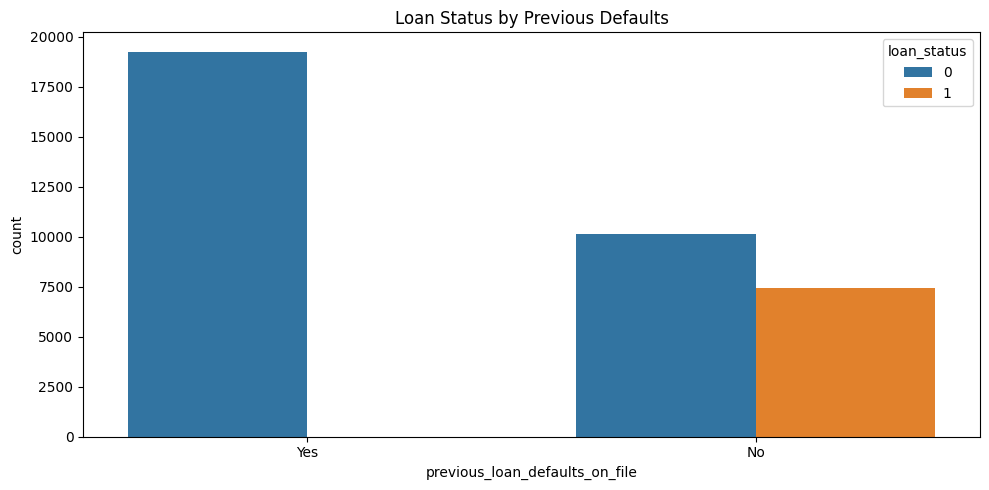

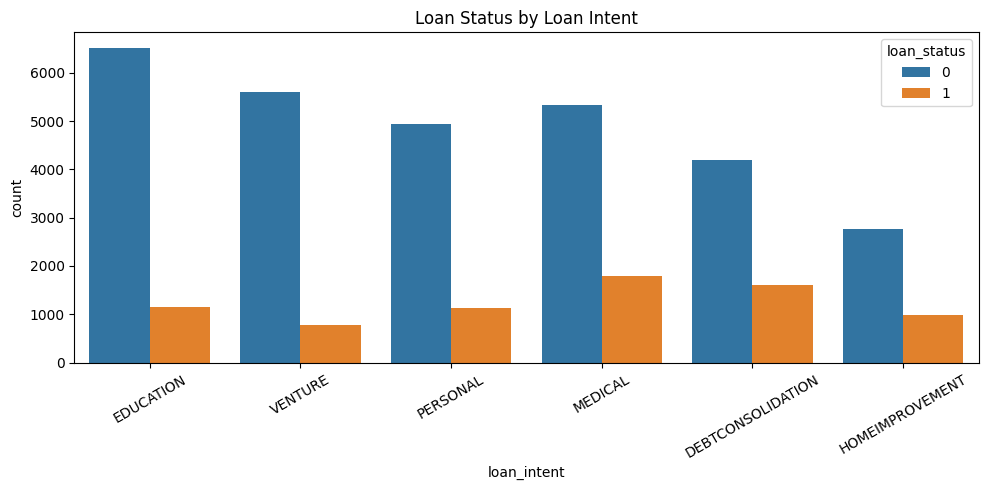

In [18]:
# Categorical vs target
plt.figure(figsize=(10,5))
sns.countplot(x='person_gender', hue='loan_status', data=df, palette='husl')
plt.title('Loan Status by Gender')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='person_education', hue='loan_status', data=df)
plt.title('Loan Status by Education')
plt.xticks(rotation=30)
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title('Loan Status by Home Ownership')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status', data=df)
plt.title('Loan Status by Previous Defaults')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.title('Loan Status by Loan Intent')
plt.xticks(rotation=30)
plt.tight_layout(); plt.show()

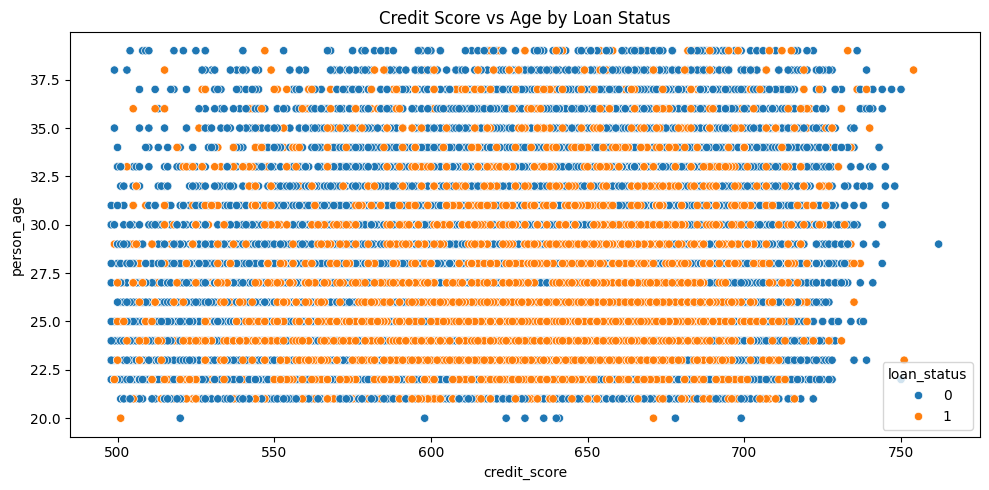

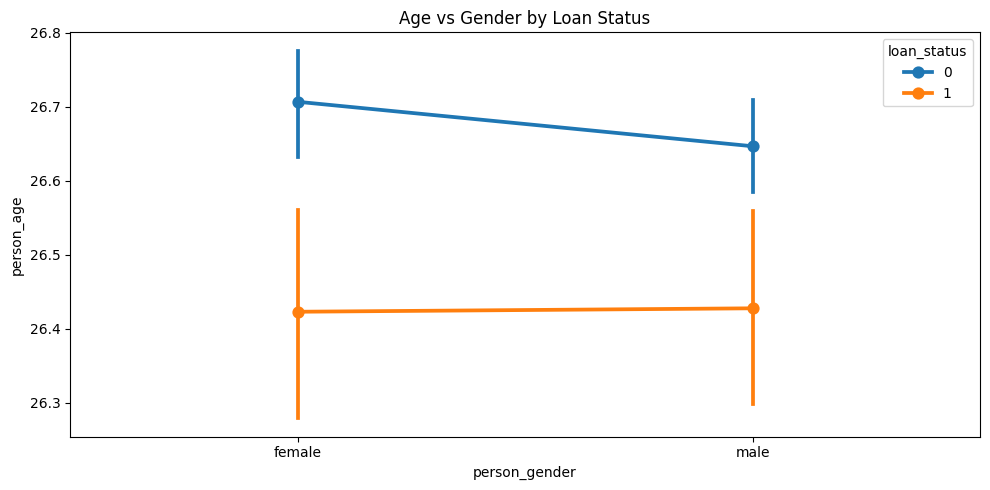

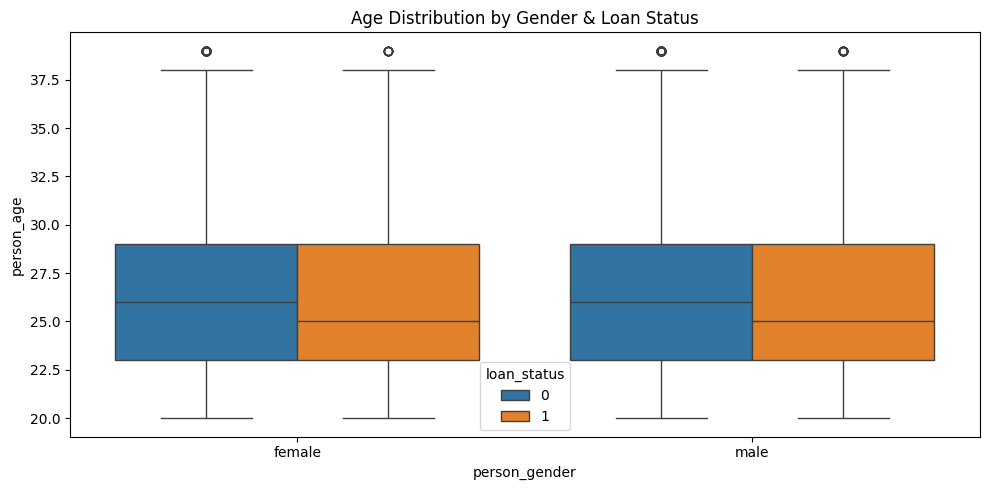

In [19]:
# Multivariate
plt.figure(figsize=(10,5))
sns.scatterplot(x='credit_score', y='person_age', hue='loan_status', data=df)
plt.title('Credit Score vs Age by Loan Status')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.pointplot(x='person_gender', y='person_age', hue='loan_status', data=df)
plt.title('Age vs Gender by Loan Status')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='person_gender', y='person_age', hue='loan_status', data=df)
plt.title('Age Distribution by Gender & Loan Status')
plt.tight_layout(); plt.show()

# Feature Engineering

In [20]:
# -----------------------------
# 3.5 Feature Engineering
# -----------------------------
df['credit_utilization']   = df['loan_amnt'] / df['person_income']
df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt']

# Kategori risiko kredit sederhana
if 'credit_score' in df.columns:
    df['credit_risk_category'] = pd.cut(
        df['credit_score'],
        bins=[300, 580, 670, 740, 850],
        labels=['High Risk', 'Medium Risk', 'Low Risk', 'Very Low Risk']
    )
else:
    df['credit_risk_category'] = 'Unknown'

display(df[['person_income','loan_amnt','credit_utilization','income_to_loan_ratio','credit_risk_category']].head())

,person_income,loan_amnt,credit_utilization,income_to_loan_ratio,credit_risk_category
1,12282.0,1000.0,0.081420,12.282000,High Risk
5,12951.0,2500.0,0.193035,5.180400,High Risk
9,12739.0,1600.0,0.125599,7.961875,Medium Risk
19,14283.0,1750.0,0.122523,8.161714,Low Risk
23,13866.0,1500.0,0.108178,9.244000,Medium Risk


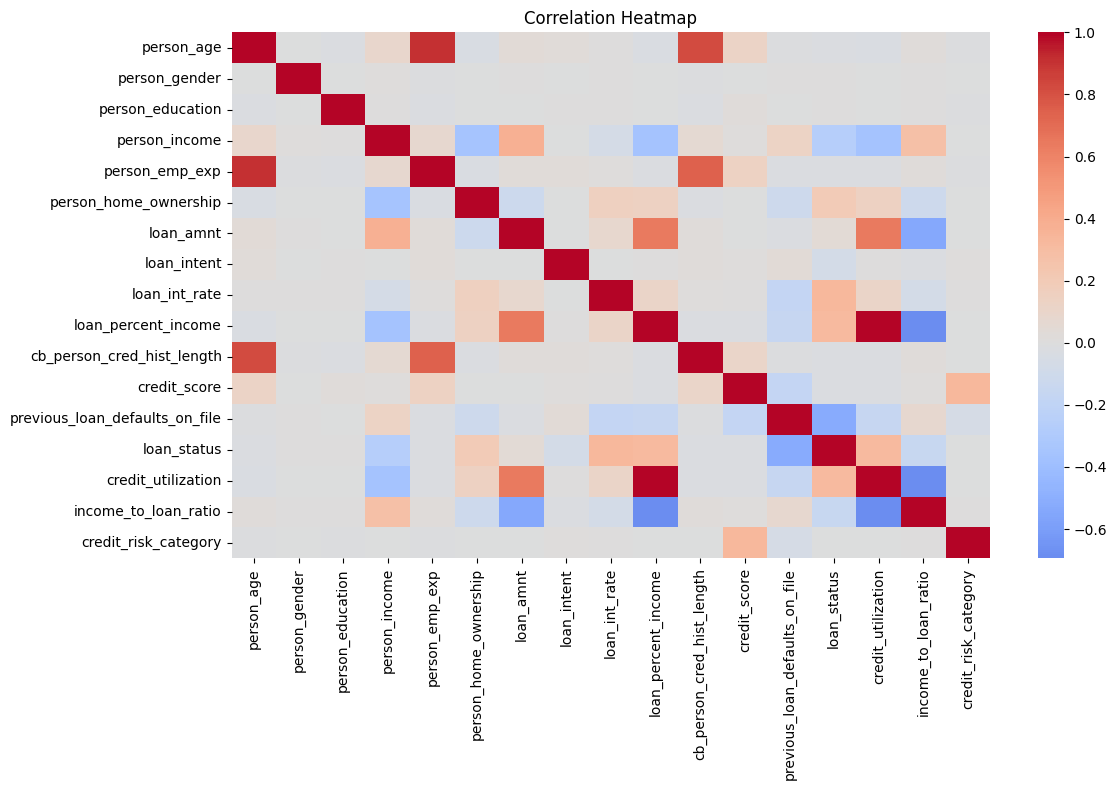

In [21]:
# -----------------------------
# 3.6 Encoding & Correlation
# -----------------------------
categorical_cols = [
    'person_gender','person_education','person_home_ownership',
    'loan_intent','previous_loan_defaults_on_file','credit_risk_category'
]
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Feature Selection

In [23]:
# Simple correlation-based selection
threshold = 0.01
corr = df.corr()
high_corr_features = corr.index[abs(corr['loan_status']) > threshold].tolist()
if 'loan_status' in high_corr_features:
    high_corr_features.remove('loan_status')

print('Selected features (corr-based):', high_corr_features)

Selected features (corr-based): ['person_age', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'credit_utilization', 'income_to_loan_ratio']


# Split Data

In [24]:
# -----------------------------
# 3.7 Train/Test Split + SMOTE (Train Only) + Scaling
# -----------------------------
TARGET = 'loan_status'
if len(high_corr_features) == 0:
    X = df.drop(columns=[TARGET]).copy()
else:
    X = df[high_corr_features].copy()
y = df[TARGET].copy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

scaler = RobustScaler()  # tahan outlier
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled        = scaler.transform(X_test)

# Modelling

In [27]:
# -----------------------------
# 4) Modeling — GridSearchCV
# -----------------------------
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

In [28]:
best_models = {}
best_cv_scores = {}

for model_name, model in models.items():
    print(f'\nTuning {model_name}...')
    grid = param_grid[model_name]
    gs = GridSearchCV(
        estimator=model,
        param_grid=grid,
        cv=5,
        n_jobs=-1,
        verbose=1,
        scoring='accuracy'
    )
    gs.fit(X_train_smote_scaled, y_train_smote)
    best_models[model_name] = gs.best_estimator_
    best_cv_scores[model_name] = gs.best_score_
    print(f'Best Hyperparameters for {model_name}: {gs.best_params_}')
    print(f'Best CV Score: {gs.best_score_:.4f}')


Tuning Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9390

Tuning Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best CV Score: 0.8846

Tuning SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best CV Score: 0.9040

Tuning KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best CV Score: 0.9160

Tuning Gradient Boosting...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best CV Score: 0.9416


# Evaluation

In [29]:
# -----------------------------
# 5) Evaluation & Comparison
# -----------------------------
cols = ['Model', 'Accuracy', 'F1 Score', 'AUC', 'Cross-validation Score']
results_df = pd.DataFrame(columns=cols)

for model_name, model in best_models.items():
    print(f'\nEvaluating {model_name}...')
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    cv_score = best_cv_scores.get(model_name, np.nan)

    results_df = pd.concat([
        results_df,
        pd.DataFrame([{
            'Model': model_name,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'AUC': auc,
            'Cross-validation Score': cv_score
        }])
    ], ignore_index=True)

print('\nModel Performance on Test Set:')
display(results_df.sort_values('F1 Score', ascending=False))


Evaluating Random Forest...

Evaluating Logistic Regression...

Evaluating SVM...

Evaluating KNN...

Evaluating Gradient Boosting...

Model Performance on Test Set:


,Model,Accuracy,F1 Score,AUC,Cross-validation Score
4,Gradient Boosting,0.928426,0.927473,0.974433,0.941596
0,Random Forest,0.909004,0.910541,0.965747,0.938957
2,SVM,0.869890,0.877000,0.945283,0.903979
3,KNN,0.858482,0.866194,0.904438,0.915979
1,Logistic Regression,0.849925,0.860139,0.942898,0.884638


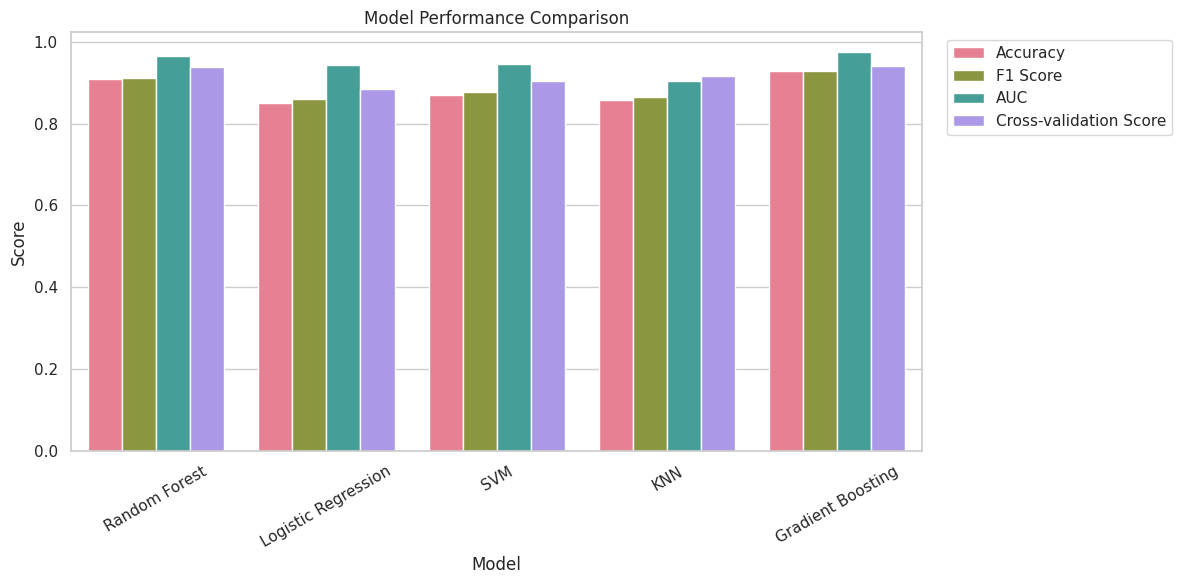

In [30]:
# Grouped barplot
a = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(12,6))
sns.set_theme(style='whitegrid')
sns.barplot(x='Model', y='Score', hue='Metric', data=a, palette='husl')
plt.title('Model Performance Comparison')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

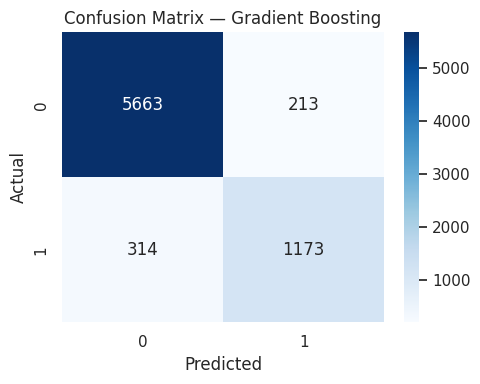

Classification Report — Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5876
           1       0.85      0.79      0.82      1487

    accuracy                           0.93      7363
   macro avg       0.90      0.88      0.89      7363
weighted avg       0.93      0.93      0.93      7363



In [31]:
# -----------------------------
# 5.1 Confusion Matrix & Classification Report (Best by AUC fallback F1)
# -----------------------------
if results_df['AUC'].notna().any():
    best_auc_name = results_df.loc[results_df['AUC'].idxmax(), 'Model']
else:
    best_auc_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']

best_auc_model = best_models[best_auc_name]
y_pred_best = best_auc_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix — {best_auc_name}')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(f'Classification Report — {best_auc_name}')
print(classification_report(y_test, y_pred_best))

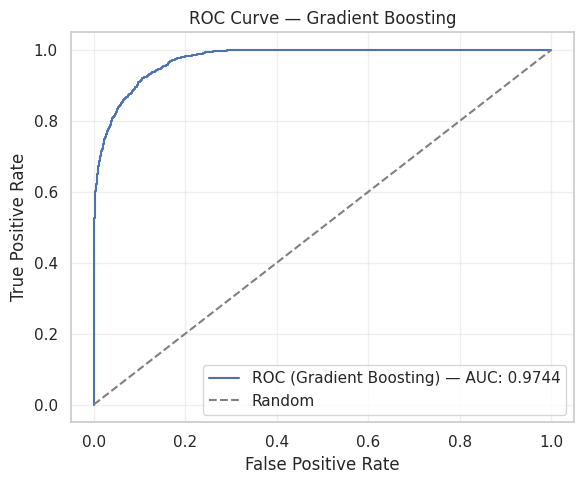

In [32]:
# -----------------------------
# 5.2 ROC Curve (Best AUC Model)
# -----------------------------
if hasattr(best_auc_model, 'predict_proba'):
    y_proba_best = best_auc_model.predict_proba(X_test_scaled)[:, 1]
else:
    # Untuk model tanpa predict_proba (contoh SVM linear), gunakan decision_function
    y_proba_best = best_auc_model.decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC ({best_auc_name}) — AUC: {np.nanmax(results_df["AUC"]):.4f}')
plt.plot([0,1], [0,1], '--', color='gray', label='Random')
plt.title(f'ROC Curve — {best_auc_name}')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

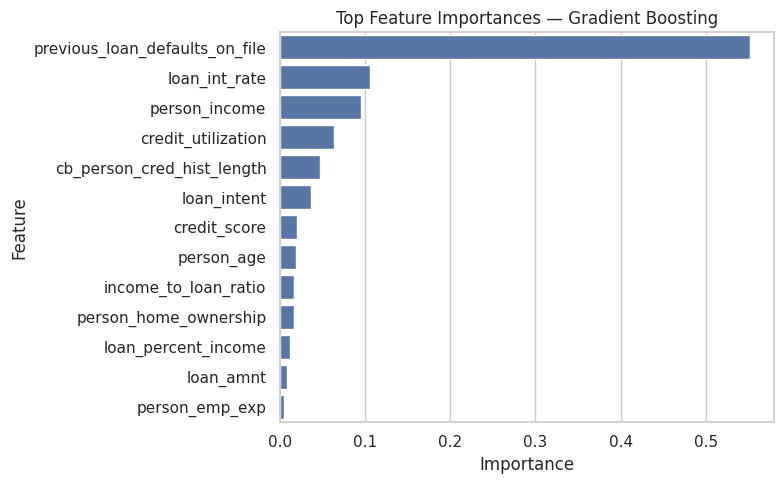

In [33]:
# -----------------------------
# 5.3 Feature Importance (Jika tersedia)
# -----------------------------
if hasattr(best_auc_model, 'feature_importances_'):
    importances = pd.Series(best_auc_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x=importances.values[:15], y=importances.index[:15])
    plt.title(f'Top Feature Importances — {best_auc_name}')
    plt.xlabel('Importance'); plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

In [34]:
# -----------------------------
# 6) (Opsional) Simpan Artefak Model
# -----------------------------
from pathlib import Path
import joblib
out_dir = Path('/content/drive/MyDrive/portfolio/models')
out_dir.mkdir(parents=True, exist_ok=True)
joblib.dump(best_auc_model, out_dir / 'loan_best_model.joblib')
joblib.dump(scaler, out_dir / 'loan_scaler.joblib')

['/content/drive/MyDrive/portfolio/models/loan_scaler.joblib']